# **Face detection using Restnet152**


In [1]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from zipfile import ZipFile
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.applications import ResNet152V2
from keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

Set random seeds for reproducibility

In [2]:
keras.utils.set_random_seed(7)
random.seed(7)
np.random.seed(7)
tensorflow.random.set_seed(7)

Load and extract dataset

In [3]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

# Extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:04<00:00, 42.3MB/s]
100% 163M/163M [00:04<00:00, 35.3MB/s]
The dataset is extracted


Data preprocessing

In [4]:
data = []
categories = ['with_mask', 'without_mask']
for category in categories:
    path = os.path.join('/content/data', category)
    label = 0 if category == 'with_mask' else 1

    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        data.append([img, label])

Shuffle the data

In [5]:
random.Random(4).shuffle(data)

Separate features and labels

In [6]:
X = []
y = []
for feature, label in data:
    X.append(feature)
    y.append(label)

Convert to numpy arrays

In [7]:
X = np.array(X)
y = np.array(y)
X = X / 255.0  # Normalize pixel values
data = None  # Free memory

In [ ]:
model=Sequential()
model.add(base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1,activation='sigmoid'))

In [8]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [9]:
# Define input shape and create ResNet base model
input_shape = (128, 128, 3)
base = ResNet152V2(include_top=False, weights="imagenet", input_tensor=Input(shape=input_shape))
base.trainable = False

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [10]:
# Build the full model
model = Sequential([
    base,
    Flatten(),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [11]:
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 93s 315ms/step - accuracy: 0.9318 - loss: 0.6909 - val_accuracy: 0.9735 - val_loss: 0.0943
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 29s 98ms/step - accuracy: 0.9885 - loss: 0.0769 - val_accuracy: 0.9775 - val_loss: 0.1700
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9972 - loss: 0.0156 - val_accuracy: 0.9762 - val_loss: 0.2608
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9966 - loss: 0.0284 - val_accuracy: 0.9768 - val_loss: 0.3081
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9971 - loss: 0.0219 - val_accuracy: 0.9689 - val_loss: 0.4861
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9962 - loss: 0.1418 - val_accuracy: 0.9729 - val_loss: 0.5630
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9983 - loss: 0.0247 - val_accuracy: 0.9742 - val_loss: 0.4848
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.9953 - loss: 0.039

In [13]:
# Evaluate the model
y_prob = model.predict(X_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 255ms/step


In [14]:
# Print evaluation results
print(f"Accuracy is {acc*100:.2f}%")
print(f"Recall is {recall*100:.2f}%")
print(cm)

Accuracy is 97.42%
Recall is 97.99%
[[741  24]
 [ 15 731]]


Plot training history

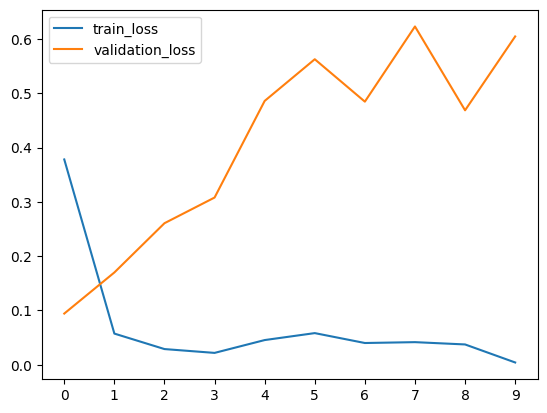

In [15]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.xticks(np.arange(0, epochs, 1))
plt.show()

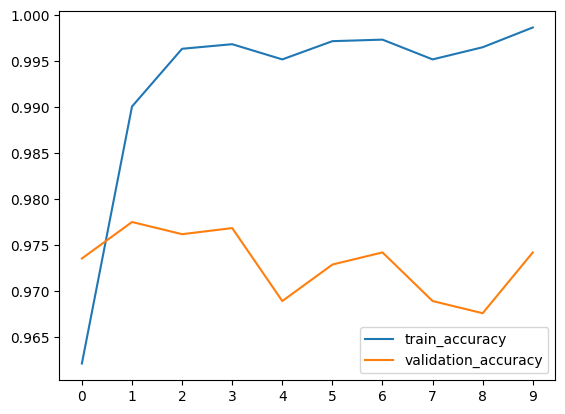

In [16]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.xticks(np.arange(0, epochs, 1))
plt.show()

Function to predict if a person is wearing a mask or not

In [17]:
def predict_mask(image_path, model):
    img = cv2.imread(image_path)  # Load the image

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Preprocess the image
    img_resized = cv2.resize(img, (128, 128))  # Resize to 128x128 as required by the model
    img_resized = img_resized / 255.0  # Normalize pixel values
    img_resized = np.reshape(img_resized, (1, 128, 128, 3))  # Reshape for model input

    # Make the prediction
    prediction = model.predict(img_resized)
    predicted_label = np.where(prediction > 0.5, 1, 0)  # Use 0.5 as threshold for binary classification

    # Output the result
    if predicted_label == 1:
        print("The person in the image is **not** wearing a mask.")
    else:
        print("The person in the image is wearing a mask.")

Enter the path to the image: /content/data/without_mask/without_mask_1004.jpg


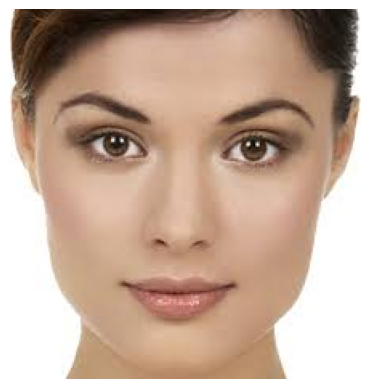

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The person in the image is **not** wearing a mask.


In [19]:
image_path = input("Enter the path to the image: ")  # Provide the path to the image you want to check
predict_mask(image_path, model)